13дек23

### Материала этой работы не будет в контрольной. За эту работу нельзя получить плохую оценку. Она для тебя, если ты сдал все работы с 1 по 7.

# Классы в python на примере Перцептрона.

## Что такое Перцептрон?
Перцептрон - это алгоритм линейной классификации, используемый для разделения двух классов. Он обучается находить границу принятия решений, разделяющую два класса с использованием прямой. Перцептрон является базовой однослойной нейронной сетью, вдохновленной базовыми элементами обработки в мозге, называемыми нейронами. Он используется для принятия решения, принадлежит ли вход к одному классу или другому.
</br>На 6-7 уроках мы проходили метод k-средних, но он не идеален, так как он не сможет обучиться правильно кластеризовать такие данные.

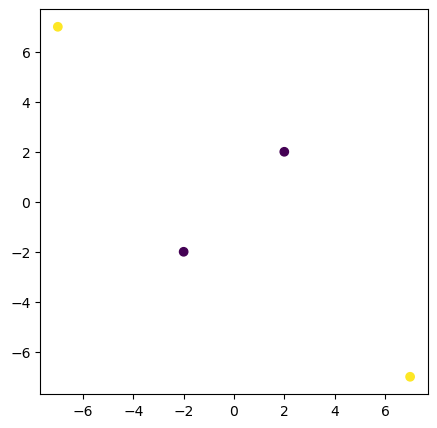

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

df = pd.DataFrame({'a':[2, -2, 7, -7],
                   'b':[2, -2, -7, 7],
                   'cluster':[0, 0, 1, 1]})

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x=df['a'], y=df['b'], c=df['cluster'])
plt.show()

Для таких случаев используют более сложные алгоритмы из нескольких перцептронов, в чаще нескольких слоев перцептронов. Для дальнейшего понимания очень советую посмотреть [этот](https://www.youtube.com/watch?v=RJCIYBAAiEI&t=12s) видос. Дальше напишу класс перцептрона.

In [2]:
class Perceptron:
    def __init__(self, num_features):
        self.weights = [np.random.uniform(0, 1) for _ in range(num_features)]
        # self.weights = [0 for _ in range(num_features)]

    def predict(self, inputs):
        activation = 0
        for i in range(len(self.weights)):
            activation += self.weights[i] * inputs[i]
        return 1 if activation > 0 else -1

    def train(self, training_inputs, labels, learning_rate=0.1, epochs=100):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                for i in range(len(self.weights)):
                    self.weights[i] += learning_rate * (label - prediction) * inputs[i]

Вот подробное объяснение каждой функции:
1. *\_\_init__(self, num_features)* </br>Это конструктор класса. Он инициализирует веса перцептрона. num_features - количество признаков во входных данных. Веса инициализируются рандомно.
2. *predict(self, inputs)* </br>Это метод, который принимает входные данные и возвращает прогноз перцептрона для этих данных. Он вычисляет взвешенную сумму входов с учетом весов и смещения, а затем применяет пороговую функцию, возвращая 1, если активация больше 0, и -1 в противном случае.
3. *train(self, training_inputs, labels, learning_rate=0.1, epochs=100)* </br>Это метод, который обучает перцептрон на основе входных данных и соответствующих меток. Он использует алгоритм обучения перцептрона, чтобы корректировать веса в течение нескольких эпох. Параметры learning_rate и epochs управляют скоростью обучения и количеством итераций обучения соответственно. </br>Последняя отвечает за корректировку весов в процессе обучения перцептрона. Более конкретно, в этой строке происходит обновление весов на основе ошибки предсказания и входных данных. Это осуществляется с использованием алгоритма обучения перцептрона, который корректирует веса с учётом заданной скорости обучения и разницы между предсказанной меткой и фактической меткой.

### Теперь разберемся с данными
Я хочу, чтобы перцептрон обучился выдавать 1, если первое число больше второго, и -1, если меньше или равно.

In [3]:
def make_test(n, f=-10, t=10):
    test = []
    for i in range(n):
        test.append([(np.random.randint(f, t), np.random.randint(f, t))])
        new = np.sign(test[-1][0][0] - test[-1][0][1])
        test[-1].append(new if new != 0 else -1)
    test = pd.DataFrame(test)
    test.columns = pd.Index(['in', 'out'])
    return test

train = make_test(1000)
train

,in,out
0,"(-5, 1)",-1
1,"(2, -2)",1
2,"(-1, 1)",-1
3,"(-5, 5)",-1
4,"(-10, 6)",-1
...,...,...
995,"(-1, -8)",1
996,"(9, -7)",1
997,"(-8, -2)",-1
998,"(-4, 1)",-1


In [4]:
test = make_test(100)
test

,in,out
0,"(1, 5)",-1
1,"(-6, 8)",-1
2,"(-6, 1)",-1
3,"(1, -6)",1
4,"(5, -9)",1
...,...,...
95,"(9, -7)",1
96,"(5, -3)",1
97,"(5, -2)",1
98,"(8, -1)",1


## Приступим к обучению

In [5]:
per1 = Perceptron(2) # на вход дается 2 числа
per1.train(train['in'], train['out'])

a, n = 0, len(test)
for i in range(n):
    if per1.predict(test.iloc[i, 0]) ==  test.iloc[i, 1]:
        a += 1

a / n

0.98

In [6]:
per1.weights

[29.149264433772313, -27.760815244132008]

98% отличный результат, но могут возникнуть трудности, если немного поменять выборку. Теперь в ней будут числа не от -10 до 10, а от 1000 до 1010.

In [7]:
test = make_test(100, 1000, 1010)

a, n = 0, len(test)
for i in range(n):
    if per1.predict(test.iloc[i, 0]) ==  test.iloc[i, 1]:
        a += 1

a / n

0.49

Вот и поплыл наш Перцептрончик, значит ему нужна выборка с более близкими числами, сейчас исправим. Создам для этого новый Перцептронец.

In [8]:
train = make_test(100, 1000, 1010)

per2 = Perceptron(2)
per2.train(train['in'], train['out'])

test = make_test(100, 1000, 1010)

a, n = 0, len(test)
for i in range(n):
    if per2.predict(test.iloc[i, 0]) ==  test.iloc[i, 1]:
        a += 1

a / n

1.0

In [9]:
per1.weights, per2.weights

([29.149264433772313, -27.760815244132008],
 [740.6787584086908, -740.885352393222])

Интересно, что если с самого начала расставить в Перцептроне нулевые веса (строчка с решеткой в классе перцептрона), то при обучении он почти всегда будет приходить к противоположным числам (которые и будут правильным решением этой задачи).

---
## Задача для самостоятельного выполнения

Реализовать класс перцептрона, у которого будут не только веса, но и смещение. Обучить его выполнять функцию XOR (исключающее ИЛИ). Для обучения использовать собственную выборку. Функцию активации взять отсюда.

In [10]:
f = lambda a: 1 if a > 0.5 else 0
f(10), f(-0.5), f(2 * 0.5 + -5 * 0.4 + 2)

(1, 0, 1)